In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from keras.layers import Dropout
import numpy as np

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
dataset = pd.read_csv('bor2hci.csv', header=0, index_col=0)
dataset=dataset.fillna(0)
#dataset=dataset.del((:,0))
#dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

Train on 249 samples, validate on 25 samples
Epoch 1/1000
 - 2s - loss: 0.3261 - val_loss: 0.2429
Epoch 2/1000
 - 0s - loss: 0.2723 - val_loss: 0.2321
Epoch 3/1000
 - 0s - loss: 0.2482 - val_loss: 0.2144
Epoch 4/1000
 - 0s - loss: 0.2361 - val_loss: 0.2181
Epoch 5/1000
 - 0s - loss: 0.2273 - val_loss: 0.2204
Epoch 6/1000
 - 0s - loss: 0.2221 - val_loss: 0.2225
Epoch 7/1000
 - 0s - loss: 0.2051 - val_loss: 0.2204
Epoch 8/1000
 - 0s - loss: 0.1997 - val_loss: 0.2165
Epoch 9/1000
 - 0s - loss: 0.1924 - val_loss: 0.2180
Epoch 10/1000
 - 0s - loss: 0.1975 - val_loss: 0.2182
Epoch 11/1000
 - 0s - loss: 0.1888 - val_loss: 0.2173
Epoch 12/1000
 - 0s - loss: 0.1858 - val_loss: 0.2184
Epoch 13/1000
 - 0s - loss: 0.1817 - val_loss: 0.2131
Epoch 14/1000
 - 0s - loss: 0.1899 - val_loss: 0.2140
Epoch 15/1000
 - 0s - loss: 0.1766 - val_loss: 0.2163
Epoch 16/1000
 - 0s - loss: 0.1795 - val_loss: 0.2136
Epoch 17/1000
 - 0s - loss: 0.1763 - val_loss: 0.2128
Epoch 18/1000
 - 0s - loss: 0.1735 - val_loss:

Epoch 152/1000
 - 0s - loss: 0.1194 - val_loss: 0.1585
Epoch 153/1000
 - 0s - loss: 0.1197 - val_loss: 0.1630
Epoch 154/1000
 - 0s - loss: 0.1186 - val_loss: 0.1655
Epoch 155/1000
 - 0s - loss: 0.1190 - val_loss: 0.1672
Epoch 156/1000
 - 0s - loss: 0.1190 - val_loss: 0.1587
Epoch 157/1000
 - 0s - loss: 0.1194 - val_loss: 0.1610
Epoch 158/1000
 - 0s - loss: 0.1196 - val_loss: 0.1587
Epoch 159/1000
 - 0s - loss: 0.1192 - val_loss: 0.1599
Epoch 160/1000
 - 0s - loss: 0.1191 - val_loss: 0.1659
Epoch 161/1000
 - 0s - loss: 0.1186 - val_loss: 0.1580
Epoch 162/1000
 - 0s - loss: 0.1185 - val_loss: 0.1597
Epoch 163/1000
 - 0s - loss: 0.1189 - val_loss: 0.1587
Epoch 164/1000
 - 0s - loss: 0.1189 - val_loss: 0.1690
Epoch 165/1000
 - 0s - loss: 0.1194 - val_loss: 0.1604
Epoch 166/1000
 - 0s - loss: 0.1193 - val_loss: 0.1704
Epoch 167/1000
 - 0s - loss: 0.1187 - val_loss: 0.1644
Epoch 168/1000
 - 0s - loss: 0.1181 - val_loss: 0.1616
Epoch 169/1000
 - 0s - loss: 0.1188 - val_loss: 0.1591
Epoch 170/

Epoch 301/1000
 - 0s - loss: 0.1127 - val_loss: 0.1590
Epoch 302/1000
 - 0s - loss: 0.1116 - val_loss: 0.1614
Epoch 303/1000
 - 0s - loss: 0.1114 - val_loss: 0.1612
Epoch 304/1000
 - 0s - loss: 0.1112 - val_loss: 0.1602
Epoch 305/1000
 - 0s - loss: 0.1116 - val_loss: 0.1630
Epoch 306/1000
 - 0s - loss: 0.1122 - val_loss: 0.1628
Epoch 307/1000
 - 0s - loss: 0.1125 - val_loss: 0.1598
Epoch 308/1000
 - 0s - loss: 0.1112 - val_loss: 0.1613
Epoch 309/1000
 - 0s - loss: 0.1114 - val_loss: 0.1595
Epoch 310/1000
 - 0s - loss: 0.1129 - val_loss: 0.1644
Epoch 311/1000
 - 0s - loss: 0.1118 - val_loss: 0.1612
Epoch 312/1000
 - 0s - loss: 0.1114 - val_loss: 0.1664
Epoch 313/1000
 - 0s - loss: 0.1111 - val_loss: 0.1619
Epoch 314/1000
 - 0s - loss: 0.1115 - val_loss: 0.1640
Epoch 315/1000
 - 0s - loss: 0.1113 - val_loss: 0.1603
Epoch 316/1000
 - 0s - loss: 0.1111 - val_loss: 0.1669
Epoch 317/1000
 - 0s - loss: 0.1115 - val_loss: 0.1592
Epoch 318/1000
 - 0s - loss: 0.1114 - val_loss: 0.1601
Epoch 319/

Epoch 450/1000
 - 0s - loss: 0.1072 - val_loss: 0.1637
Epoch 451/1000
 - 0s - loss: 0.1079 - val_loss: 0.1589
Epoch 452/1000
 - 0s - loss: 0.1070 - val_loss: 0.1576
Epoch 453/1000
 - 0s - loss: 0.1070 - val_loss: 0.1568
Epoch 454/1000
 - 0s - loss: 0.1074 - val_loss: 0.1684
Epoch 455/1000
 - 0s - loss: 0.1016 - val_loss: 0.1587
Epoch 456/1000
 - 0s - loss: 0.0935 - val_loss: 0.1577
Epoch 457/1000
 - 0s - loss: 0.0888 - val_loss: 0.1608
Epoch 458/1000
 - 0s - loss: 0.0874 - val_loss: 0.1614
Epoch 459/1000
 - 0s - loss: 0.0881 - val_loss: 0.1620
Epoch 460/1000
 - 0s - loss: 0.0869 - val_loss: 0.1559
Epoch 461/1000
 - 0s - loss: 0.0868 - val_loss: 0.1555
Epoch 462/1000
 - 0s - loss: 0.0872 - val_loss: 0.1658
Epoch 463/1000
 - 0s - loss: 0.0864 - val_loss: 0.1581
Epoch 464/1000
 - 0s - loss: 0.0868 - val_loss: 0.1588
Epoch 465/1000
 - 0s - loss: 0.0859 - val_loss: 0.1557
Epoch 466/1000
 - 0s - loss: 0.0866 - val_loss: 0.1586
Epoch 467/1000
 - 0s - loss: 0.0861 - val_loss: 0.1512
Epoch 468/

Epoch 599/1000
 - 0s - loss: 0.0655 - val_loss: 0.1387
Epoch 600/1000
 - 0s - loss: 0.0657 - val_loss: 0.1411
Epoch 601/1000
 - 0s - loss: 0.0662 - val_loss: 0.1402
Epoch 602/1000
 - 0s - loss: 0.0664 - val_loss: 0.1441
Epoch 603/1000
 - 0s - loss: 0.0663 - val_loss: 0.1370
Epoch 604/1000
 - 0s - loss: 0.0666 - val_loss: 0.1434
Epoch 605/1000
 - 0s - loss: 0.0662 - val_loss: 0.1381
Epoch 606/1000
 - 0s - loss: 0.0659 - val_loss: 0.1384
Epoch 607/1000
 - 0s - loss: 0.0667 - val_loss: 0.1381
Epoch 608/1000
 - 0s - loss: 0.0664 - val_loss: 0.1437
Epoch 609/1000
 - 0s - loss: 0.0656 - val_loss: 0.1366
Epoch 610/1000
 - 0s - loss: 0.0656 - val_loss: 0.1384
Epoch 611/1000
 - 0s - loss: 0.0655 - val_loss: 0.1359
Epoch 612/1000
 - 0s - loss: 0.0657 - val_loss: 0.1370
Epoch 613/1000
 - 0s - loss: 0.0656 - val_loss: 0.1436
Epoch 614/1000
 - 0s - loss: 0.0656 - val_loss: 0.1381
Epoch 615/1000
 - 0s - loss: 0.0657 - val_loss: 0.1406
Epoch 616/1000
 - 0s - loss: 0.0657 - val_loss: 0.1370
Epoch 617/

Epoch 748/1000
 - 0s - loss: 0.0638 - val_loss: 0.1353
Epoch 749/1000
 - 0s - loss: 0.0630 - val_loss: 0.1382
Epoch 750/1000
 - 0s - loss: 0.0628 - val_loss: 0.1351
Epoch 751/1000
 - 0s - loss: 0.0630 - val_loss: 0.1358
Epoch 752/1000
 - 0s - loss: 0.0629 - val_loss: 0.1408
Epoch 753/1000
 - 0s - loss: 0.0638 - val_loss: 0.1348
Epoch 754/1000
 - 0s - loss: 0.0628 - val_loss: 0.1401
Epoch 755/1000
 - 0s - loss: 0.0630 - val_loss: 0.1359
Epoch 756/1000
 - 0s - loss: 0.0638 - val_loss: 0.1354
Epoch 757/1000
 - 0s - loss: 0.0625 - val_loss: 0.1385
Epoch 758/1000
 - 0s - loss: 0.0630 - val_loss: 0.1348
Epoch 759/1000
 - 0s - loss: 0.0628 - val_loss: 0.1339
Epoch 760/1000
 - 0s - loss: 0.0626 - val_loss: 0.1356
Epoch 761/1000
 - 0s - loss: 0.0629 - val_loss: 0.1357
Epoch 762/1000
 - 0s - loss: 0.0634 - val_loss: 0.1360
Epoch 763/1000
 - 0s - loss: 0.0635 - val_loss: 0.1437
Epoch 764/1000
 - 0s - loss: 0.0634 - val_loss: 0.1373
Epoch 765/1000
 - 0s - loss: 0.0636 - val_loss: 0.1403
Epoch 766/

Epoch 897/1000
 - 0s - loss: 0.0613 - val_loss: 0.1318
Epoch 898/1000
 - 0s - loss: 0.0620 - val_loss: 0.1352
Epoch 899/1000
 - 0s - loss: 0.0615 - val_loss: 0.1358
Epoch 900/1000
 - 0s - loss: 0.0610 - val_loss: 0.1334
Epoch 901/1000
 - 0s - loss: 0.0608 - val_loss: 0.1377
Epoch 902/1000
 - 0s - loss: 0.0609 - val_loss: 0.1329
Epoch 903/1000
 - 0s - loss: 0.0608 - val_loss: 0.1329
Epoch 904/1000
 - 0s - loss: 0.0609 - val_loss: 0.1343
Epoch 905/1000
 - 0s - loss: 0.0612 - val_loss: 0.1340
Epoch 906/1000
 - 0s - loss: 0.0612 - val_loss: 0.1362
Epoch 907/1000
 - 0s - loss: 0.0614 - val_loss: 0.1351
Epoch 908/1000
 - 0s - loss: 0.0611 - val_loss: 0.1340
Epoch 909/1000
 - 0s - loss: 0.0615 - val_loss: 0.1361
Epoch 910/1000
 - 0s - loss: 0.0616 - val_loss: 0.1360
Epoch 911/1000
 - 0s - loss: 0.0610 - val_loss: 0.1345
Epoch 912/1000
 - 0s - loss: 0.0612 - val_loss: 0.1351
Epoch 913/1000
 - 0s - loss: 0.0617 - val_loss: 0.1432
Epoch 914/1000
 - 0s - loss: 0.0613 - val_loss: 0.1346
Epoch 915/

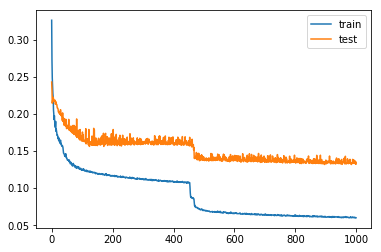

In [4]:
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=10,activation='relu',input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(110,activation='relu',input_shape=(n_steps_in, n_features)))
model.add(Dense(150,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [5]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 313.425


In [6]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [7]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 12, 8)
(3, 8)
(192,)


In [8]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [9]:
print(ninhat[:,4:7])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.87192219e+01 0.00000000e+00 2.23378918e+02]
 [0.00000000e+00 0.00000000e+00 1.01490665e+02]
 [1.69216885e+01 1.22072603e-02 1.64656555e+02]
 [1.36840302e+02 0.00000000e+00 3.60810405e+02]
 [1.20555950e+02 0.00000000e+00 4.27611070e+02]
 [3.43989370e+02 1.03682573e-01 4.64274870e+02]
 [3.89102327e+02 0.00000000e+00 7.63852450e+02]
 [4.87228544e+02 0.00000000e+00 9.31519424e+02]
 [5.54229406e+02 1.41701818e-01 8.31285557e+02]
 [4.81638349e+02 0.00000000e+00 9.40711744e+02]
 [5.71338528e+02 0.00000000e+00 8.99072970e+02]
 [6.34008325e+02 2.34936287e-01 8.64046686e+02]
 [4.48607958e+02 0.00000000e+00 9.38814639e+02]
 [4.13856872e+02 0.00000000e+00 8.26171156e+02]
 [4.58656578e+02 1.75780650e-01 7.97419945e+02]
 [1.89067474e+02 0.00000000e+00 7.13352093e+02]
 [2.54768910e+02 0.00000000e+00 7.29941632e+02]
 [3.39269324e+02 1.10225556e-01 7.938049

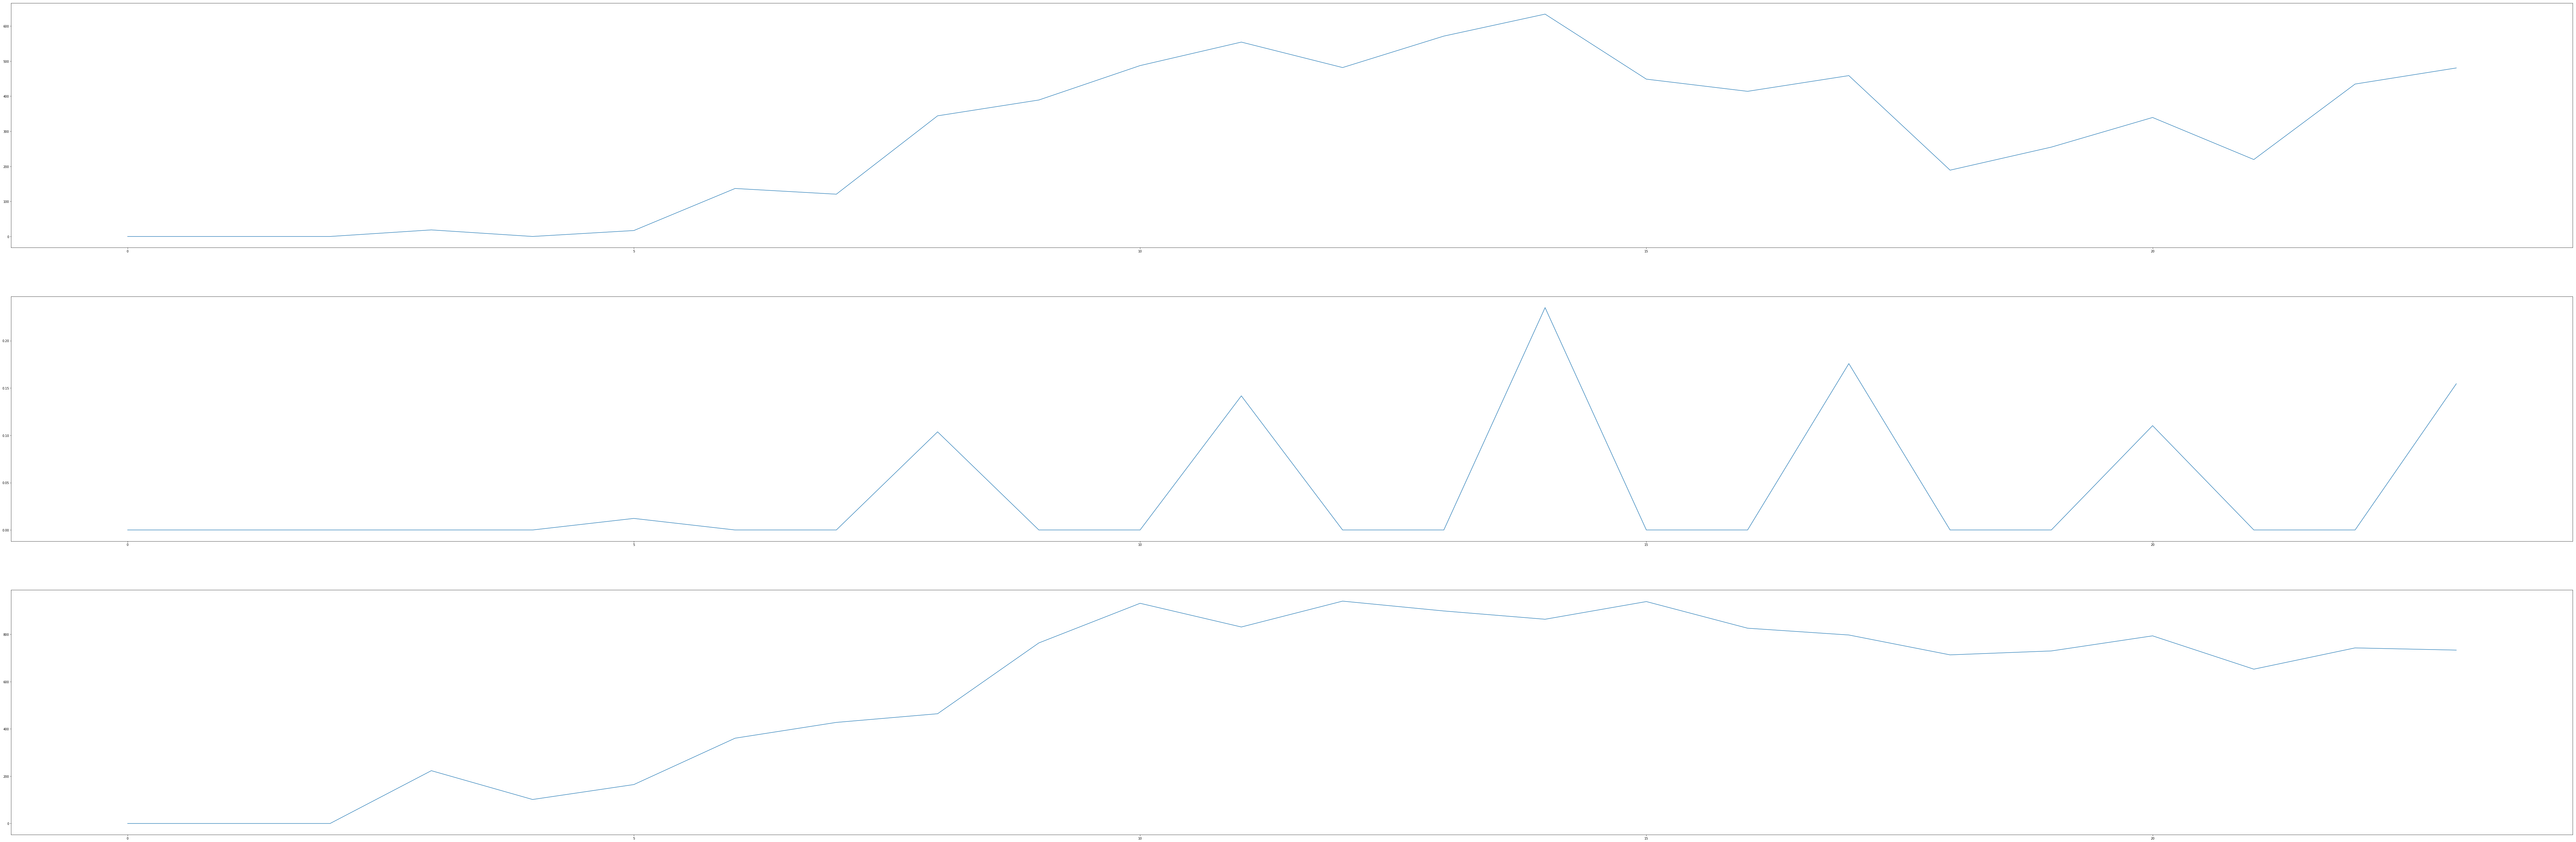

In [10]:
groups = [4,5,6]
i = 1
# plot each column
plt.figure(figsize=(150,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[:,group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


In [11]:
new = dataset

In [12]:
new.shape

(275, 8)

In [13]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [14]:
new.index

Index(['01/10/91', '01/11/91', '01/12/91', '01/01/92', '01/02/92', '01/03/92',
       '01/04/92', '01/05/92', '01/06/92', '01/07/92',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=275)

In [15]:
nin=new.index[-1]
print(nin)

01/12/14


In [16]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [17]:
newxhat.shape

(24, 8)

In [18]:
new=new.append(newxhat)
new.shape

(299, 8)

In [19]:
new.tail()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
19,417.681358,29.190881,17.318402,176.469639,254.768910,0.000000,729.941632,140.645314
20,374.107071,28.725693,15.883901,212.222404,339.269324,0.110226,793.804959,175.245918
21,458.969240,27.924707,8.518838,117.384871,219.368142,0.000000,652.863317,108.241680
22,447.587330,29.174865,9.398431,266.826438,434.595114,0.000000,742.814291,196.935269
23,392.360087,28.710182,9.723873,297.658986,480.482273,0.154515,733.515828,220.700310


In [21]:
newbori = new.to_csv('newbori12b.csv')